# KNN

## 데이터 준비 및 확인

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
data = pd.read_csv('datasets/citrus.csv')

In [139]:
#!pip install scikit-learn

In [140]:
data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [141]:
import sklearn

sklearn.__version__

'1.1.1'

In [142]:
citrus = data.copy()

In [143]:
citrus['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [144]:
citrus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [145]:
citrus.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [146]:
citrus[citrus.duplicated()]

,name,diameter,weight,red,green,blue


In [147]:
citrus['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

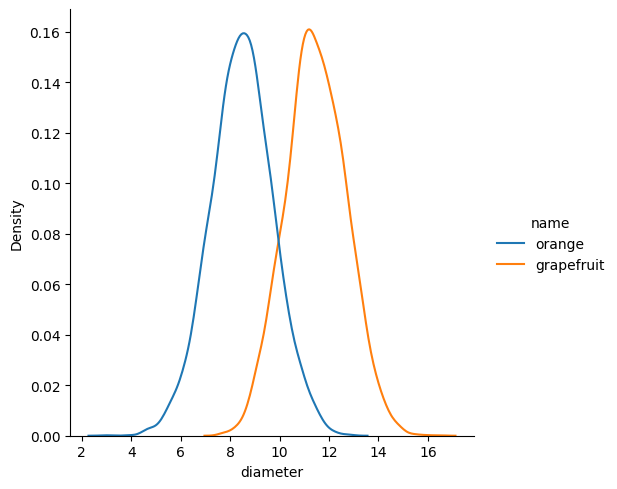

In [148]:
sns.displot(data = citrus, x = 'diameter', hue = 'name', kind = 'kde')

## 데이터 전처리

In [149]:
## label encoding (map)
## encoding 할 때 먼저 잘 바뀌었는지 확인해보고 데이터 바꾸기!!

#citrus['name'] = citrus['name'].map({'grapefruit' : 0, 'orange' : 1})

In [150]:
#citrus

In [151]:
## label encoding (sklearn)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(citrus['name'])
citrus['name'] = le.transform(citrus['name'])

# citrus['name'] = le.fit_transform(citrus['name'])

In [152]:
citrus

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,0,15.35,253.89,149,77,20
9996,0,15.41,254.67,148,68,7
9997,0,15.59,256.50,168,82,20
9998,0,15.92,260.14,142,72,11


In [153]:
le.classes_

array(['grapefruit', 'orange'], dtype=object)

## train data와 test data 분리

In [154]:
# 먼저 x,y 분리

x = citrus.iloc[:,1:]

In [155]:
y = citrus.iloc[:,0]

In [156]:
x.head()

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9


In [157]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: name, dtype: int32

In [158]:
# train, test 분리
#(슬라이싱 이용)

#x, y = sklearn.utils.shuffle(x, y)

#idx = int(citrus.shape[0]*0.8)

#x_train = x.iloc[:idx,:]
#x_test = x.iloc[idx:,:]
#y_train = y[:idx]
#y_test = y[idx:]

In [160]:
# train, test 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022, stratify = y, shuffle = True)
#stratify는 잘 섞일 수 있도록 조정
#서순 조심

In [162]:
x_train.head(10)

,diameter,weight,red,green,blue
465,6.82,128.08,159,93,3
5055,8.81,153.11,139,64,4
978,7.42,136.61,154,76,15
4787,10.67,184.66,166,88,19
105,5.84,114.96,152,84,17
4537,10.13,177.59,171,75,14
2986,8.79,157.27,151,94,11
3692,9.26,164.67,140,66,11
7217,11.27,194.67,143,68,2
3425,9.06,161.77,157,75,2


## 스케일링 작업

In [164]:
# 표준화

#u = x_train['diameter'].mean()
#s = x_train['diameter'].std()
#z = (x_train['diameter']-u)/s

In [167]:
# standard scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
x_train_scaler = ss.transform(x_train)

In [168]:
x_train_scaler[:5]

array([[-1.61852607, -1.60693378,  0.48456216,  1.45730586, -0.92140149],
       [-0.59932084, -0.75195291, -1.42739703, -1.02134167, -0.81169288],
       [-1.31122801, -1.31556395,  0.00657236,  0.00430558,  0.39510185],
       [ 0.35330314,  0.32573973,  1.15374787,  1.02995284,  0.8339363 ],
       [-2.12044623, -2.05508996, -0.18462356,  0.68807042,  0.61451907]])

In [171]:
# x_train_scaler가 nd array 타입이므로 y_train도 어레이 타입으로 변경

y_train = y_train.to_numpy()
# y_train = y_train.values()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [172]:
y_train

array([1, 0, 1, ..., 0, 0, 0])

## 모델 학습

In [177]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train_scaler, y_train)

KNeighborsClassifier()

In [179]:
x_test_scaler = ss.transform(x_test)

In [204]:
y_pred = clf.predict(x_test_scaler)

In [205]:
(y_pred == y_test).sum()

1841

## 평가

In [187]:
from sklearn.metrics import confusion_matrix

#앞에 정답값을 넣어야함
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[915,  85],
       [ 74, 926]], dtype=int64)

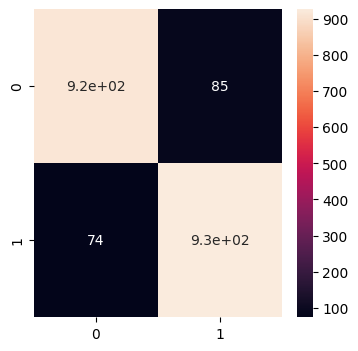

In [192]:
plt.figure(figsize = (4,4))
sns.heatmap(cfm, annot = True)
plt.show()

In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    
    print('정확도 : {}'.format(accuracy_score(y_test, y_pred)))
    print('정밀도 : {}'.format(precision_score(y_test, y_pred)))
    print('재현율 : {}'.format(recall_score(y_test, y_pred)))
    


In [208]:
print_score(y_test, y_pred)

정확도 : 0.9205
정밀도 : 0.9159248269040554
재현율 : 0.926


In [229]:

acc_scores = []
for k in range(3,30):
    #새로운 모델
    #학습
    #예측 정확도
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train_scaler, y_train)
    y_pred = model.predict(x_test_scaler)
    acc_scores.append(accuracy_score(y_test, y_pred))


In [231]:
acc_scores

[0.9175,
 0.919,
 0.9205,
 0.921,
 0.9245,
 0.9235,
 0.926,
 0.926,
 0.925,
 0.924,
 0.922,
 0.9225,
 0.9225,
 0.9225,
 0.9245,
 0.9255,
 0.924,
 0.926,
 0.923,
 0.9245,
 0.9275,
 0.9265,
 0.929,
 0.929,
 0.93,
 0.931,
 0.93]

## K-Fold

In [232]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)

acc_scores = []

for train_idx, vali_idx in kf.split(x_train_scaler):
    train_x, vali_x = x_train_scaler[train_idx], x_train_scaler[vali_idx]
    train_y, vali_y = y_train[train_idx], y_train[vali_idx]
    
    #학습
    model = KNeighborsClassifier(n_neighbors = 5)
    model.fit(train_x, train_y)
    y_pred = model.predict(vali_x)
    acc_scores.append(accuracy_score(vali_y, y_pred))

print(np.array(acc_scores).mean())

0.9193749999999999


In [228]:
acc_scores

[0.914375, 0.91125, 0.934375, 0.92125, 0.915625]

In [245]:
acc_scores = []


for train_idx, vali_idx in kf.split(x_train_scaler):
    train_x, vali_x = x_train_scaler[train_idx], x_train_scaler[vali_idx]
    train_y, vali_y = y_train[train_idx], y_train[vali_idx]
    
    for k in range(3,50):
        
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(train_x, train_y)
        y_pred = model.predict(vali_x)
        acc_scores.append(accuracy_score(vali_y, y_pred))
        print(np.array(acc_scores).mean())


0.90375
0.90375
0.9072916666666667
0.9075000000000001
0.9082500000000001
0.9090625000000001
0.9092857142857144
0.9096093749999999
0.9099305555555556
0.9099999999999999
0.9100568181818182
0.91015625
0.9102403846153847
0.9102232142857144
0.910375
0.910625
0.9108455882352942
0.9110763888888889
0.911282894736842
0.91153125
0.9117559523809524
0.9119318181818182
0.9121467391304349
0.9122916666666668
0.9124750000000001
0.9125721153846155
0.9127314814814816
0.9128794642857144
0.9129956896551726
0.9131458333333335
0.9132862903225809
0.91341796875
0.9135795454545454
0.9136948529411765
0.9138571428571428
0.9139409722222221
0.9140202702702701
0.9140624999999998
0.9141185897435895
0.9141406249999999
0.9141463414634146
0.9141964285714285
0.9142296511627905
0.9142329545454544
0.9142777777777776
0.9142934782608694
0.9143484042553189
0.9140234375
0.9138137755102042
0.9137625000000001
0.9136029411764707
0.9134855769230771
0.9133726415094341
0.913275462962963
0.9132045454545454
0.9131919642857144
0.91319

In [241]:
#!pip install tqdm

     ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00


In [242]:
## 교차 검증 방법

from sklearn.model_selection import cross_val_score
from tqdm import tqdm
#tqdm으로 모델이 돌아가고 있는지 확인 가능

hist = []

for k in tqdm(range(3,50)):
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, x_train_scaler, y_train, cv = 5, scoring = 'accuracy')
    
    hist.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:09<00:00,  4.85it/s]


In [244]:
hist

[0.909,
 0.9112500000000001,
 0.915,
 0.9164999999999999,
 0.9176249999999999,
 0.9190000000000002,
 0.91975,
 0.9200000000000002,
 0.9212499999999999,
 0.9205,
 0.91975,
 0.9203749999999999,
 0.9217500000000001,
 0.9215,
 0.9233750000000001,
 0.92325,
 0.9231250000000001,
 0.924,
 0.924,
 0.92425,
 0.9243749999999998,
 0.9247500000000001,
 0.9253750000000001,
 0.925,
 0.9256249999999999,
 0.9250000000000002,
 0.9248750000000001,
 0.9257499999999999,
 0.926375,
 0.9251249999999999,
 0.9255000000000001,
 0.9245000000000001,
 0.9257500000000001,
 0.926375,
 0.926375,
 0.9261250000000001,
 0.9259999999999999,
 0.9253750000000001,
 0.9262500000000001,
 0.92675,
 0.9259999999999999,
 0.9265000000000001,
 0.9265000000000001,
 0.925,
 0.9253750000000001,
 0.9255000000000001,
 0.9259999999999999]